In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras import optimizers
from keras import losses
from keras import metrics
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from keras import initializers
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import random
import keras.backend as K
from sklearn.metrics import confusion_matrix

In [262]:
import tensorflow as tf
print(tf.__version__)


2.14.0


In [263]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [264]:
df.shape

(303, 14)

In [265]:
print("Attribute: ", df.shape[1] - 1)
print("Instances: ", df.shape[0])

Attribute:  13
Instances:  303


In [266]:
df.columns = ['A1','A2','A3','A3','A5','A6','A7','A8','A9','A10','A11','A12','A13','Class']
df.head()

,A1,A2,A3,A3,A5,A6,A7,A8,A9,A10,A11,A12,A13,Class
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      303 non-null    int64  
 1   A2      303 non-null    int64  
 2   A3      303 non-null    int64  
 3   A3      303 non-null    int64  
 4   A5      303 non-null    int64  
 5   A6      303 non-null    int64  
 6   A7      303 non-null    int64  
 7   A8      303 non-null    int64  
 8   A9      303 non-null    int64  
 9   A10     303 non-null    float64
 10  A11     303 non-null    int64  
 11  A12     303 non-null    int64  
 12  A13     303 non-null    int64  
 13  Class   303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


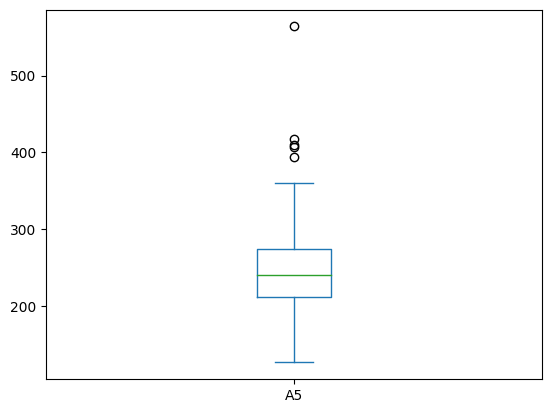

In [268]:
df['A5'].plot(kind="box")
plt.show()

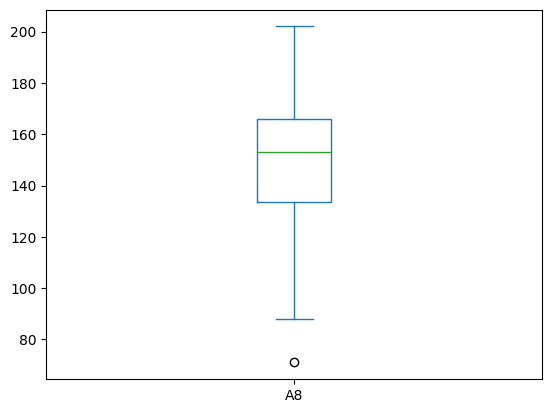

In [269]:
df['A8'].plot(kind="box")
plt.show()

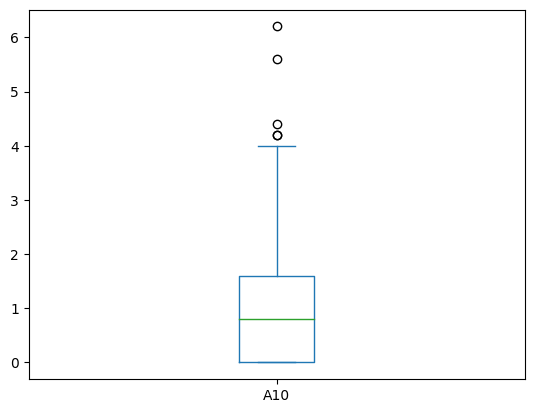

In [270]:
df['A10'].plot(kind="box")
plt.show()

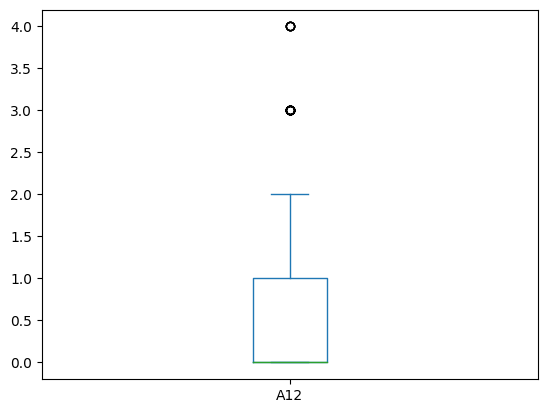

In [271]:
df['A12'].plot(kind="box")
plt.show()

In [272]:
df.head()
scaler = MinMaxScaler()
df['A1'] = scaler.fit_transform(df[['A1']])
df['A2'] = scaler.fit_transform(df[['A2']])
df['A3'] = scaler.fit_transform(df[['A3']])
# df['A4'] = scaler.fit_transform(df[['A4']])
df['A5'] = scaler.fit_transform(df[['A5']])
df['A6'] = scaler.fit_transform(df[['A6']])
df['A7'] = scaler.fit_transform(df[['A7']])
df['A8'] = scaler.fit_transform(df[['A8']])
df['A9'] = scaler.fit_transform(df[['A9']])
df['A10'] = scaler.fit_transform(df[['A10']])
df['A11'] = scaler.fit_transform(df[['A11']])
df['A12'] = scaler.fit_transform(df[['A12']])
df['A13'] = scaler.fit_transform(df[['A13']])


In [273]:
features = df.loc[:, df.columns != 'Class']
features

,A1,A2,A3,A3,A5,A6,A7,A8,A9,A10,A11,A12,A13
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000


In [274]:
#df['Class'].replace('Iris-setosa',0,inplace=True)
#df['Class'].replace('Iris-versicolor',1,inplace=True)
#df['Class'].replace('Iris-virginica',2,inplace=True)
label = df.iloc[:,-1:]
label
#label = label.to_list()

,Class
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [275]:
df.head()

,A1,A2,A3,A3,A5,A6,A7,A8,A9,A10,A11,A12,A13,Class
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1


In [276]:
seed_value = 0
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
initializer = initializers.glorot_uniform(seed=60)


In [277]:
network = Sequential()
network.add(Dense(13, activation='relu', input_shape=(13,), kernel_initializer=initializer))
network.add(Dense(60, activation='relu', kernel_initializer=initializer))
network.add(Dense(30, activation='relu', kernel_initializer=initializer))
network.add(Dense(20, activation='relu', kernel_initializer=initializer))
network.add(Dense(15, activation='relu', kernel_initializer=initializer))
network.add(Dense(10, activation='relu', kernel_initializer=initializer))
network.add(Dense(5, activation='relu', kernel_initializer=initializer))
network.add(Dense(30, activation='relu', kernel_initializer=initializer))
network.add(Dense(1, activation='sigmoid', kernel_initializer=initializer))

In [278]:
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))

    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())

    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1

In [279]:
def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1 - y_true, 0, 1)))

    spec = true_negatives / (possible_negatives + K.epsilon())
    return spec

In [280]:
network.compile(optimizer = optimizers.Adagrad(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy',f1_score,specificity])

In [281]:
X_train, X_test, Y_train, Y_test = train_test_split(features, label, test_size=0.3, random_state=40 )

In [282]:
es = EarlyStopping(monitor='val_accuracy',patience=50,min_delta=0.002)
#X_train=np.asarray(X_train).astype(np.int)
#Y_train=np.asarray(Y_train).astype(np.int)
history = network.fit(X_train, Y_train, validation_split=0, validation_data=(X_test,Y_test), epochs=60, batch_size=25,callbacks=es)

Epoch 1/60
9/9 [==============================] - 1s 42ms/step - loss: 0.6919 - accuracy: 0.5094 - f1_score: 0.6160 - specificity: 0.1111 - val_loss: 0.6776 - val_accuracy: 0.5604 - val_f1_score: 0.7180 - val_specificity: 0.0000e+00
Epoch 2/60
9/9 [==============================] - 0s 8ms/step - loss: 0.6843 - accuracy: 0.5377 - f1_score: 0.6996 - specificity: 0.0000e+00 - val_loss: 0.6642 - val_accuracy: 0.5604 - val_f1_score: 0.7180 - val_specificity: 0.0000e+00
Epoch 3/60
9/9 [==============================] - 0s 6ms/step - loss: 0.6579 - accuracy: 0.5896 - f1_score: 0.7225 - specificity: 0.1279 - val_loss: 0.6644 - val_accuracy: 0.7033 - val_f1_score: 0.6423 - val_specificity: 0.9583
Epoch 4/60
9/9 [==============================] - 0s 8ms/step - loss: 0.6406 - accuracy: 0.6651 - f1_score: 0.6613 - specificity: 0.5409 - val_loss: 0.7125 - val_accuracy: 0.4396 - val_f1_score: 0.0000e+00 - val_specificity: 1.0000
Epoch 5/60
9/9 [==============================] - 0s 8ms/step - loss: 0

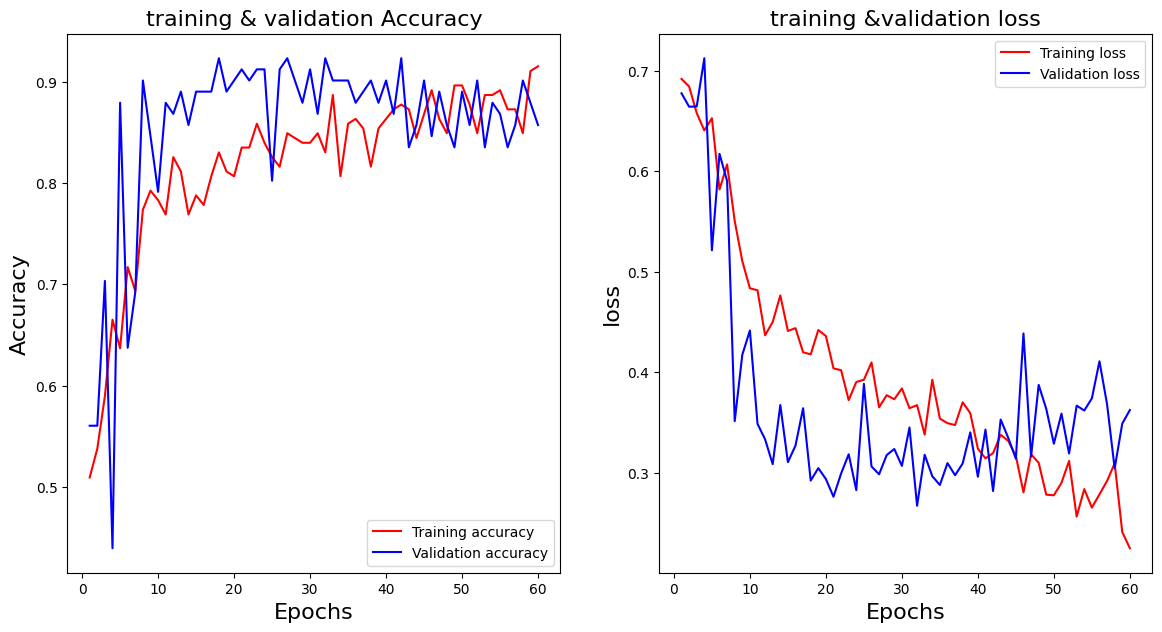

In [283]:
history_dict = history.history
loss_values = history_dict['loss']

val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']

val_accuracy = history_dict['val_accuracy']

epochs = range(1,len(loss_values)+1)
fig, ax = plt.subplots(1, 2, figsize=(14,7))

ax[0].plot(epochs, accuracy, 'r', label="Training accuracy")
ax[0].plot(epochs, val_accuracy, 'b', label="Validation accuracy")
ax[0].set_title("training & validation Accuracy", fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy',fontsize=16)
ax[0].legend()


ax[1].plot(epochs, loss_values, 'r', label="Training loss")
ax[1].plot(epochs, val_loss_values, 'b', label="Validation loss")
ax[1].set_title("training &validation loss", fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('loss',fontsize=16)
ax[1].legend()



3/3 [==============================] - 0s 4ms/step


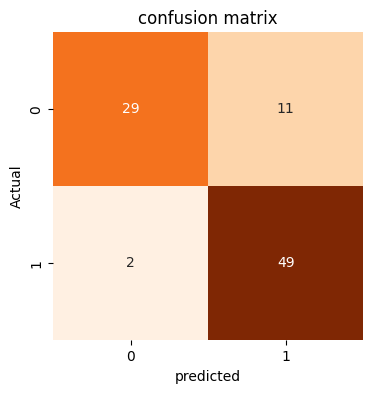

In [284]:
import seaborn as sns
Y_pred = network.predict(X_test).round()
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt = 'g', vmin=0, cbar=False, cmap='Oranges')
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title("confusion matrix")
plt.show()

In [285]:
target_names = ['Class 0', 'Class 1']
print(classification_report(Y_test, Y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.94      0.72      0.82        40
     Class 1       0.82      0.96      0.88        51

    accuracy                           0.86        91
   macro avg       0.88      0.84      0.85        91
weighted avg       0.87      0.86      0.85        91



In [286]:
# Generate confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Calculate true positives and false negatives
true_positives = cm[1, 1]
false_negatives = cm[1, 0]

# Calculate sensitivity
sensitivity_value = true_positives / (true_positives + false_negatives)

In [287]:
evaluation = network.evaluate(X_test, Y_test)
accuracy = evaluation[1]
f1_score_value = evaluation[2]
specificity_value = evaluation[3]

print(f'Accuracy: {accuracy:.4f}')
print(f'F-score: {f1_score_value:.4f}')
print(f'Specificity: {specificity_value:.4f}')
print(f'Sensitivity: {sensitivity_value:.4f}')

3/3 [==============================] - 0s 8ms/step - loss: 0.3622 - accuracy: 0.8571 - f1_score: 0.8828 - specificity: 0.7262
Accuracy: 0.8571
F-score: 0.8828
Specificity: 0.7262
Sensitivity: 0.9608
